# Twitter US Airline Sentiment data Analysis

In [42]:
from IPython.core.display import display, HTML
display(HTML("<style>.container{max-width:95%!important;width:auto!important;}</style>"))

In [43]:
#Import the libraries, load dataset, the print shape of data, data description

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [45]:
!pip install gensim

In [46]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score,accuracy_score,recall_score
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

In [47]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec


In [48]:
DF = pd.read_csv("tweets.csv")
DF.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


**Most relevant features in Dataset:**

1.tweet_id --> Tweet id unique no to store tweets.

2.airline_sentiment --> It can be positive or negative or neutral

3.negativereason --> categorical data shows reason of negative tweet

4.airline --> Airline name this is also a Categorical feature, it has six values

5.text --> tweet conent.

6.tweet_coord --> lattitude and longitude of tweeter user

In [38]:
DF.shape

(14640, 15)

### Find and remove the duplicates

In [15]:
duplicateDFRow = DF[DF.duplicated(keep=False)]
duplicateDFRow.sort_values("tweet_id", inplace = True)
duplicateDFRow.shape

(72, 15)

**found 72 duplicate rows in Dataset**

In [16]:
duplicateDFRow.head(6)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
12001,570272018840428544,neutral,1.0,NaN,NaN,American,NaN,pokecrastinator,NaN,0,@AmericanAir I thought all those planes were r...,NaN,2015-02-24 09:20:19 -0800,United States,Mountain Time (US & Canada)
12162,570272018840428544,neutral,1.0,NaN,NaN,American,NaN,pokecrastinator,NaN,0,@AmericanAir I thought all those planes were r...,NaN,2015-02-24 09:20:19 -0800,United States,Mountain Time (US & Canada)
12159,570272880556011520,positive,1.0,NaN,NaN,American,NaN,ESPartee,NaN,0,"@americanair new plane, #gogo, easy power for ...","[0.0, 0.0]",2015-02-24 09:23:44 -0800,"alexandria, va",Eastern Time (US & Canada)
11998,570272880556011520,positive,1.0,NaN,NaN,American,NaN,ESPartee,NaN,0,"@americanair new plane, #gogo, easy power for ...","[0.0, 0.0]",2015-02-24 09:23:44 -0800,"alexandria, va",Eastern Time (US & Canada)
11997,570273710210469888,positive,1.0,NaN,NaN,American,NaN,Mtts28,NaN,0,@AmericanAir These are some awesome photos. Th...,NaN,2015-02-24 09:27:02 -0800,Virginia,Eastern Time (US & Canada)
12158,570273710210469888,positive,1.0,NaN,NaN,American,NaN,Mtts28,NaN,0,@AmericanAir These are some awesome photos. Th...,NaN,2015-02-24 09:27:02 -0800,Virginia,Eastern Time (US & Canada)


In [17]:

DF.drop_duplicates(keep='first',inplace=True)

In [56]:
duplicateDFRow = DF[DF.duplicated(keep=False)]
duplicateDFRow.sort_values("tweet_id", inplace = True)
duplicateDFRow.shape[0]

72

In [57]:
# New shape
DF.shape

(14640, 15)

### New Dataframe with selected features

In [59]:
# new Dataframe with selected features
twDF=DF[['tweet_id','airline_sentiment','airline','negativereason','text','tweet_coord']]
twDF.head()

,tweet_id,airline_sentiment,airline,negativereason,text,tweet_coord
0,570306133677760513,neutral,Virgin America,NaN,@VirginAmerica What @dhepburn said.,NaN
1,570301130888122368,positive,Virgin America,NaN,@VirginAmerica plus you've added commercials t...,NaN
2,570301083672813571,neutral,Virgin America,NaN,@VirginAmerica I didn't today... Must mean I n...,NaN
3,570301031407624196,negative,Virgin America,Bad Flight,@VirginAmerica it's really aggressive to blast...,NaN
4,570300817074462722,negative,Virgin America,Can't Tell,@VirginAmerica and it's a really big bad thing...,NaN


In [60]:
twDF.shape

(14640, 6)

In [61]:
#There are duplicates
duplicateDFRow = twDF[twDF.duplicated(keep=False)]
duplicateDFRow.sort_values("tweet_id", inplace = True)
duplicateDFRow.shape

(216, 6)

In [62]:
# Removing duplicates
twDF.drop_duplicates(keep='first',inplace=True)

In [51]:
duplicateDFRow = twDF[twDF.duplicated(keep=False)]
duplicateDFRow.shape[0]

0

In [63]:
twDF.shape

(14532, 6)

In [64]:
twDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14532 entries, 0 to 14639
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   tweet_id           14532 non-null  int64 
 1   airline_sentiment  14532 non-null  object
 2   airline            14532 non-null  object
 3   negativereason     9118 non-null   object
 4   text               14532 non-null  object
 5   tweet_coord        1010 non-null   object
dtypes: int64(1), object(5)
memory usage: 794.7+ KB


##There are null values in dataset

In [54]:

twDF[twDF['airline_sentiment']=='negative'].loc[twDF['negativereason'].isnull()].shape[0]

0

There are no records where sentiment is negative and a reason is not given

In [21]:
#There are no records where sentiment is positive or neutral and a reason is given
twDF[twDF['airline_sentiment']!='negative'].loc[twDF['negativereason'].notnull()].shape[0]

0

There are no records where sentiment is positive or neutral and a reason is given

## Plotting

### Pie chart for Airline Sentiments

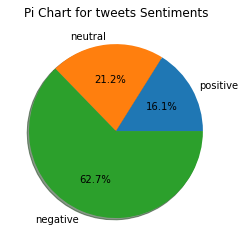

In [65]:
ST = twDF.groupby('airline_sentiment').agg('count')
plt.pie(ST.tweet_id.sort_values(), labels=ST.tweet_id.sort_values().index,autopct='%1.1f%%', shadow=True )
plt.title("Pi Chart for tweets Sentiments")
plt.show()

**Observations:**

1.Negative is too high, evean if we combine together neutral and positive, negative is more then the combined value.

2.Netural is more than positive.

### Number of tweets for every Airline

Text(0.5, 1.0, 'Number of tweets for every Airline')

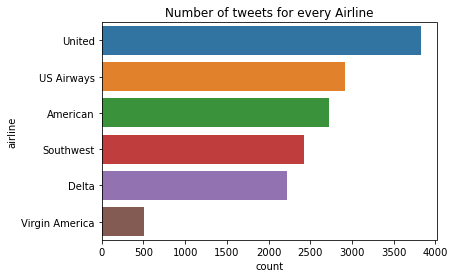

In [25]:
#number of tweets
sns.countplot(data=twDF,y=twDF['airline'],order = twDF['airline'].value_counts().index).set_title('Number of tweets for every Airline')

**Observations:**

1.The above bar chart shows that united airlines has higest number of tweets.

2.Virgin America has lowest tweet count.


Text(0.5, 1.0, 'Number of tweets for every Airline with sentiment distribution')

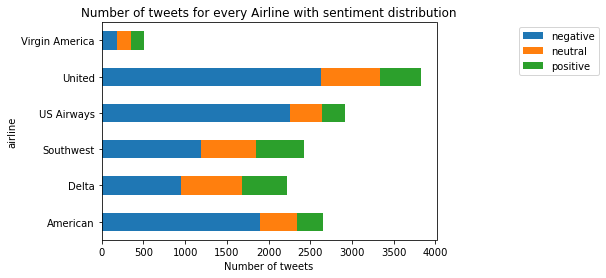

In [66]:
types = twDF.groupby("airline")['airline_sentiment'].value_counts(normalize=False).sort_index()
types.unstack().plot(kind='barh', stacked='True')
plt.legend(bbox_to_anchor=(1.5, 1), loc='upper right')
plt.xlabel("Number of tweets")
plt.title("Number of tweets for every Airline with sentiment distribution")

**Observations:**

1.United Airline has more number of negative tweets than neutral and positive combined.

2.The Southwest and Delta Airline data is good, compared to other airlines.

3.Virgin America Airline negative, neutral and positive tweets are same in number.


Text(0.5, 1.0, 'Distribution of Number of negative tweets for every Airline')

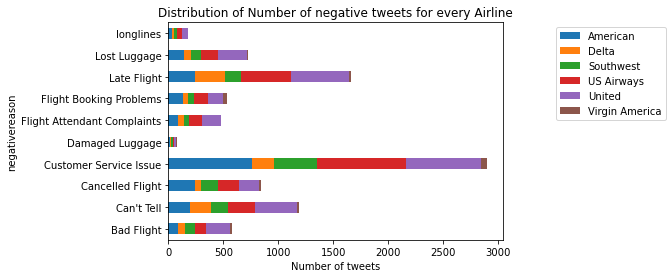

In [26]:
types = twDF.groupby("negativereason")['airline'].value_counts(normalize=False).sort_index()
types.unstack().plot(kind='barh', stacked='True')
plt.legend(bbox_to_anchor=(1.5, 1), loc='upper right')
plt.xlabel('Number of tweets')
plt.title('Distribution Number of negative tweets for every Airline')

**Observations:**

1.More number of people have suffered from Customer Serive than any other reason

2.Least number of people have suffered from damaged luggage and longliness

3.There are considerable number of people who are suffering and cant tell a reason. They might be going through some existential/identity/midlife crisis.


Text(0.5, 1.0, 'Percentage wise Distribution of Number of negative tweets for every Airline')

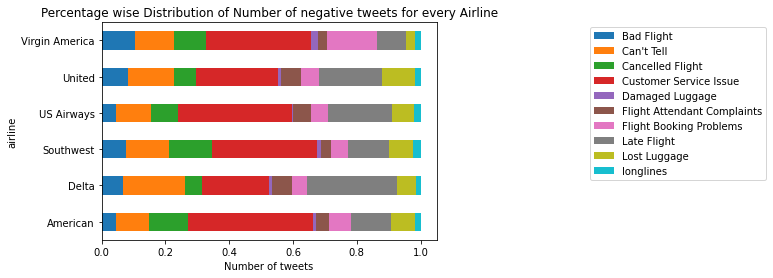

In [26]:
types = twDF.groupby("airline")['negativereason'].value_counts(normalize=True).unstack()
types.plot(kind='barh', stacked='True')
plt.legend(bbox_to_anchor=(2, 1), loc='upper right')
plt.xlabel('Number of tweets')
plt.title('Percentage wise Distribution of Number of negative tweets for every Airline')

**Observations:**

1.Here,We dont have any information about whether we ever get back our lost luggage while traveling.
2.Virgin America is safer for Your luggage. 
4.Delta passangers are suffering more due to late flights.
5.Delta and united airlines have better customer service than other airlines


In [67]:
!pip install folium

### Locations of Tweeter users on Map

In [68]:
import folium
import re
myCord=twDF['tweet_coord'].dropna().tolist()
Num=re.findall(r"[-+]?\d*\.\d+|\d+", myCord[0])
map1 = folium.Map(location=[Num[0],Num[1]], zoom_start=2)
for i in range(1, len(myCord)):
    Num=re.findall(r"[-+]?\d*\.\d+|\d+", myCord[i])
    folium.Marker([Num[0],Num[1]], icon=folium.Icon(color='red', icon='glyphicon glyphicon-user',size=2)).add_to(map1)
map1

#  Text Preprocessing feature

In [70]:
# Remove @ with Airline names
twDF['text']=twDF['text'].str.replace('@VirginAmerica','')
twDF['text']=twDF['text'].str.replace('@USAirways','')
twDF['text']=twDF['text'].str.replace('@united','')
twDF['text']=twDF['text'].str.replace('@SouthwestAir','')
twDF['text']=twDF['text'].str.replace('@AmericanAir','')
twDF['text']=twDF['text'].str.replace('@JetBlue','')


twDF.head()

,tweet_id,airline_sentiment,airline,negativereason,text,tweet_coord
0,570306133677760513,neutral,Virgin America,NaN,What @dhepburn said.,NaN
1,570301130888122368,positive,Virgin America,NaN,plus you've added commercials to the experien...,NaN
2,570301083672813571,neutral,Virgin America,NaN,I didn't today... Must mean I need to take an...,NaN
3,570301031407624196,negative,Virgin America,Bad Flight,"it's really aggressive to blast obnoxious ""en...",NaN
4,570300817074462722,negative,Virgin America,Can't Tell,and it's a really big bad thing about it,NaN


### Stopwords

In [75]:
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [73]:
# Combining all the above stundents 
from tqdm import tqdm
def preprocess_text(text_data):
    preprocessed_text = []
    # tqdm is for printing the status bar
    for sentance in tqdm(text_data):
        sent = decontracted(sentance)
        sent = sent.replace('\\r', ' ')
        sent = sent.replace('\\n', ' ')
        sent = sent.replace('\\"', ' ')
        sent = sent.replace('http"', ' ')          # added later
        sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
        sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
        preprocessed_text.append(sent.lower().strip())
    return preprocessed_text

In [74]:
# Create a new column for clean text
twDF['text_clean']=preprocess_text(twDF['text'].values)

100%|██████████| 14532/14532 [00:00<00:00, 18339.98it/s]


In [37]:
# drop the original column of text
twDF=twDF.drop(['text'],axis=1)

In [38]:
twDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14532 entries, 0 to 14639
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   tweet_id           14532 non-null  int64 
 1   airline_sentiment  14532 non-null  object
 2   negativereason     9118 non-null   object
 3   airline            14532 non-null  object
 4   text_clean         14532 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.3+ MB


**Observations:**

1.There are null values in negativereason column

2.It corresponds to records with neutral or positive reasons


In [39]:
twDF[twDF['text_clean'].isna()]

,tweet_id,airline_sentiment,negativereason,airline,text_clean


In [40]:
twDF.loc[twDF['tweet_id']==570083063331319808]

,tweet_id,airline_sentiment,negativereason,airline,text_clean
781,570083063331319808,positive,NaN,United,


In [41]:
# Merge neutral and positive sentiments in one category
twDF['airline_sentiment']=twDF['airline_sentiment'].str.replace('neutral','positive')

In [42]:
# convert class label into numerical number
# 1 is used for negative tweets so that it will reflect in recall score
twDF['airline_sentiment'].replace(to_replace='positive', value=0, inplace=True)
twDF['airline_sentiment'].replace(to_replace='negative', value=1, inplace=True)
twDF.head()

,tweet_id,airline_sentiment,negativereason,airline,text_clean
0,570306133677760513,0,NaN,Virgin America,dhepburn said
1,570301130888122368,0,NaN,Virgin America,plus added commercials experience tacky
2,570301083672813571,0,NaN,Virgin America,not today must mean need take another trip
3,570301031407624196,1,Bad Flight,Virgin America,really aggressive blast obnoxious entertainmen...
4,570300817074462722,1,Can't Tell,Virgin America,really big bad thing


## Analysis of frequency of words

In [76]:
txt = ' '.join(twDF['text_clean'])
txt=txt.split()
freq_cnt = pd.Series(txt).value_counts()
type(freq_cnt)


pandas.core.series.Series

In [77]:
freq_DF = freq_cnt.to_frame()

In [78]:
freq_DF.tail()

,0
lly144,1
influx,1
vomited,1
ialiceh2ft,1
slogan,1


In [79]:
freq=twDF['text_clean'].str.split(expand=True).stack().value_counts().to_frame()
freq.rename(columns = {0:'count'}, inplace = True) 

freq.head()

,count
flight,3904
not,3638
no,1489
get,1334
co,1206


**Observations:**

1.Flight is the most frequently used word in tweets

In [84]:
print("Total number of words in Corpus are ",freq['count'].sum())

Total number of words in Corpus are  143479


In [83]:
print("Total number of words that has appeared more than 3000 times in Corpus are ",freq.loc[freq['count']>3000].shape[0])
print("Total number of words that has appeared less than 3000 times and more than 2500 times in Corpus are ",freq.loc[freq['count']<=3000].loc[freq['count']>2500].shape[0])
print("Total number of words that has appeared less than 2500 times and more than 2000 times in Corpus are ",freq.loc[freq['count']<=2500].loc[freq['count']>2000].shape[0])
print("Total number of words that has appeared less than 2000 times and more than 1500 times in Corpus are ",freq.loc[freq['count']<=2000].loc[freq['count']>1500].shape[0])
print("Total number of words that has appeared less than 1500 times and more than 1000 times in Corpus are ",freq.loc[freq['count']<=1500].loc[freq['count']>1000].shape[0]
print("Total number of words that has appeared less than 500 times and more than 400 times in Corpus are ",freq.loc[freq['count']<=500].loc[freq['count']>400].shape[0])
print("Total number of words that has appeared less than 400 times and more than 300 times in Corpus are ",freq.loc[freq['count']<=400].loc[freq['count']>300].shape[0])
print("Total number of words that has appeared less than 300 times and more than 200 times in Corpus are ",freq.loc[freq['count']<=300].loc[freq['count']>200].shape[0])
print("Total number of words that has appeared less than 200 times and more than 100 times in Corpus are ",freq.loc[freq['count']<=200].loc[freq['count']>100].shape[0])
print("Total number of words that has appeared less than 100 times and more than 50 times in Corpus are ",freq.loc[freq['count']<=100].loc[freq['count']>50].shape[0])
print("Total number of words that has appeared less than 25 times and more than 15 times in Corpus are ",freq.loc[freq['count']<=25].loc[freq['count']>15].shape[0])
print("Total number of words that has appeared less than 15 times and more than 10 times in Corpus are ",freq.loc[freq['count']<=15].loc[freq['count']>10].shape[0])
print("Total number of words that has appeared less than 10 times and more than 5 times in Corpus are ",freq.loc[freq['count']<=10].loc[freq['count']>5].shape[0])
print("Total number of words that has appeared less than 5 times and more than 3 times in Corpus are ",freq.loc[freq['count']<=5].loc[freq['count']>3].shape[0])
print("Total number of words that has appeared 3 times in Corpus are ",freq.loc[freq['count']==3].shape[0])
print("Total number of words that has appeared 2 times in Corpus are ",freq.loc[freq['count']==2].shape[0])
print("Total number of words that has appeared 1 times in Corpus are ",freq.loc[freq['count']==1].shape[0])

Total number of words that has appeared more than 3000 times in Corpus are  2
Total number of words that has appeared less than 3000 times and more than 2500 times in Corpus are  0
Total number of words that has appeared less than 2500 times and more than 2000 times in Corpus are  0
Total number of words that has appeared less than 2000 times and more than 1500 times in Corpus are  0
Total number of words that has appeared less than 1500 times and more than 1000 times in Corpus are  6
Total number of words that has appeared less than 500 times and more than 400 times in Corpus are  9
Total number of words that has appeared less than 400 times and more than 300 times in Corpus are  25
Total number of words that has appeared less than 300 times and more than 200 times in Corpus are  52
Total number of words that has appeared less than 200 times and more than 100 times in Corpus are  133
Total number of words that has appeared less than 100 times and more than 50 times in Corpus are  250


**Observations:**

1.flight and not are the two words that are used for more than 3000 times 

2.There are 8643 words which have apppeared only once. its not good for modeling.


Text(0.5, 1.0, 'Number of words with there frequency of appearance')

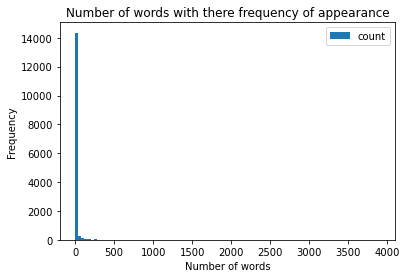

In [49]:
freq.plot.hist(bins=100)
plt.xlabel("Number of words")
plt.title("Number of words with there frequency of appearance")

**Observations:**

1.Its a very imbalanced distribution.

2.There are very large number of words that have appeared very very few times.

Text(0.5, 1.0, 'Number of words with there frequency less than 500')

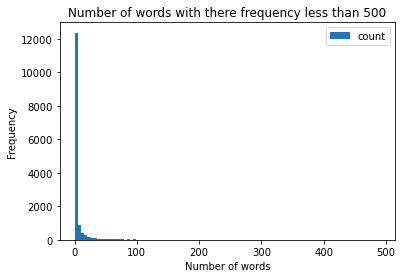

In [50]:
freq.loc[freq['count']<500].plot.hist(bins=100)
plt.xlabel("Number of words")
plt.title("Number of words with there frequency less than 500")

Text(0.5, 1.0, 'Number of words with there frequency less than 100')

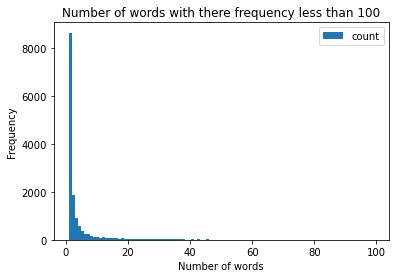

In [51]:
freq.loc[freq['count']<100].plot.hist(bins=100)
plt.xlabel("Number of words")
plt.title("Number of words with there frequency less than 100")

Text(0.5, 1.0, 'Number of words with there frequency less than 50')

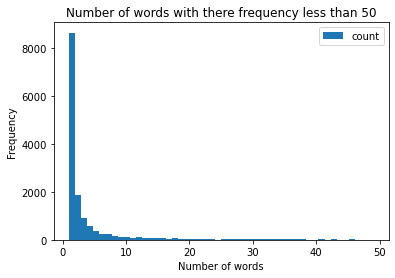

In [52]:
freq.loc[freq['count']<50].plot.hist(bins=50)
plt.xlabel("Number of words")
plt.title("Number of words with there frequency less than 50")

Text(0.5, 1.0, 'Number of words with there frequency less than 20')

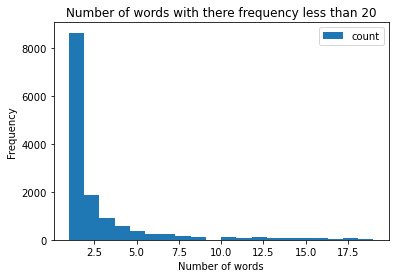

In [53]:
freq.loc[freq['count']<20].plot.hist(bins=20)
plt.xlabel("Number of words")
plt.title("Number of words with there frequency less than 20")

Text(0.5, 1.0, 'Number of words with there frequency less than 10')

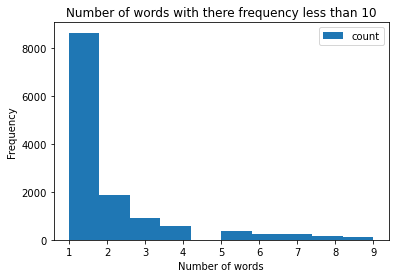

In [54]:
freq.loc[freq['count']<10].plot.hist(bins=10)
plt.xlabel("Number of words")
plt.title("Number of words with there frequency less than 10")

**Observations:**

1.There are 8643 words which have apppeared only once.

2. After that the plot falls very sharply. Never to rise again


In [55]:
freq.tail(50)

,count
unamerican,1
354,1
craftbeer,1
17a,1
bg,1
ais,1
noworstairline,1
brittanyobx11,1
n353jb,1
sabe,1


## Wordclouds

In [85]:
!pip install wordcloud

     |████████████████████████████████| 220 kB 4.0 MB/s eta 0:00:01
  Created wheel for wordcloud: filename=wordcloud-1.8.1-cp38-cp38-macosx_10_9_x86_64.whl size=160629 sha256=db70447baee3383ddda14efc8b2338cc68b7dfb9d51b70142ab9766f111d59e2
  Stored in directory: /Users/animeshsinha/Library/Caches/pip/wheels/4d/3f/0d/a2ba9b7895c9f1be89018b3141c3df3d4f9c786c882ccfbc3b
Successfully built wordcloud


### Wordcloud

In [92]:
from wordcloud import WordCloud 

plt.figure(figsize = (20,20))
wordcloud = WordCloud(background_color="white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

NameError: name 'text' is not defined

<Figure size 1440x1440 with 0 Axes>

### Wordcloud for records with negative sentiment

In [87]:
#negative cloud
textNeg = " ".join(review for review in twDF['text_clean'].loc[twDF['airline_sentiment']==1])
textNeg=textNeg.replace('flight', '')
textNeg=textNeg.replace('plane', '')
wordcloud = WordCloud(background_color="white").generate(textNeg)
plt.figure(figsize = (20,20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

ValueError: We need at least 1 word to plot a word cloud, got 0.

### Wordcloud for records with positive sentiment

In [93]:
#positive cloud
textPos = " ".join(review for review in twDF['text_clean'].loc[twDF['airline_sentiment']==0])
textPos=textPos.replace('flight', '')
#textPos=textPos.replace('http', '')
wordcloud = WordCloud(background_color="white").generate(textPos)
plt.figure(figsize = (20,20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

ValueError: We need at least 1 word to plot a word cloud, got 0.

**Observations:**

1.People like to say thank you when they are happy with airline.


## Using the pre processed file created in above steps.

In [62]:
twDF = pd.read_csv("Dataset/tweets_preprocessed.csv").drop(['Unnamed: 0'],axis=1)
twDF.head()

,tweet_id,airline_sentiment,negativereason,airline,text_clean
0,570306133677760513,0,NaN,Virgin America,dhepburn said
1,570301130888122368,0,NaN,Virgin America,plus added commercials experience tacky
2,570301083672813571,0,NaN,Virgin America,not today must mean need take another trip
3,570301031407624196,1,Bad Flight,Virgin America,really aggressive blast obnoxious entertainmen...
4,570300817074462722,1,Can't Tell,Virgin America,really big bad thing


In [63]:
twDF.shape

(14532, 5)

In [64]:
twDF["airline_sentiment"].value_counts()

1    9118
0    5414
Name: airline_sentiment, dtype: int64

It is an imbalanced dataset

In [65]:
twDF.loc[twDF['text_clean'].isnull()].shape

(13, 5)

In [66]:
#Removing records with Null values
twDF=twDF.loc[twDF['text_clean'].notnull()]

In [67]:
twDF.shape

(14519, 5)

In [73]:
y = twDF['airline_sentiment'].values
X = twDF[['text_clean']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y)

### CountVectorizer 

In [76]:
# Getting BOW 
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print("="*100)

vectorizer = CountVectorizer(min_df=2,ngram_range=(1,4))
vectorizer.fit(X_train['text_clean'])
X_train_bow = vectorizer.transform(X_train['text_clean'].values)
X_test_bow = vectorizer.transform(X_test['text_clean'].values)

print("After vectorizations")
print(X_train_bow.shape, y_train.shape)
print(X_test_bow.shape, y_test.shape)
print("="*100)

(10163, 1) (10163,)
(4356, 1) (4356,)
After vectorizations
(10163, 16140) (10163,)
(4356, 16140) (4356,)


In [77]:
X_train_bow.shape

(10163, 16140)

In [78]:
X_train_bow=X_train_bow.toarray()
X_test_bow=X_test_bow.toarray()

In [79]:
gnb = GaussianNB()
gnb.fit(X_train_bow, y_train)
pred = gnb.predict(X_test_bow)
accNB = accuracy_score(y_test, pred)
y_pred_prob = gnb.predict_proba(X_test_bow)
aucScoreBOW = roc_auc_score(y_test,  y_pred_prob[:,1])
fprBOW, tprBOW, thresholds = roc_curve(y_test, y_pred_prob[:,1] )
print("Confusion matrix")
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
print("AUC score for NB is ",aucScoreBOW)
predT=gnb.predict(X_train_bow)
print("Train Recall score for NB is ",recall_score(y_train, predT))
print("Test Recall score for NB is ",recall_score(y_test, pred))

Confusion matrix
[[1215  407]
 [ 696 2038]]
              precision    recall  f1-score   support

           0       0.64      0.75      0.69      1622
           1       0.83      0.75      0.79      2734

    accuracy                           0.75      4356
   macro avg       0.73      0.75      0.74      4356
weighted avg       0.76      0.75      0.75      4356

AUC score for NB is  0.7472515800933939
Train Recall score for NB is  0.8880702304436432
Test Recall score for NB is  0.745427944403804


**Observations:**

1.The test score of 0.7527 is fairly good

2.But the model is quite overfitting

### Using vectorizer

In [80]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print("="*100)
vectorizer = TfidfVectorizer(min_df=2,ngram_range=(1,4))
vectorizer.fit(X_train['text_clean'])
X_train_tfidf = vectorizer.transform(X_train['text_clean'].values)
X_test_tfidf = vectorizer.transform(X_test['text_clean'].values)
print("After vectorizations")
print(X_train_tfidf.shape, y_train.shape)
print(X_test_tfidf.shape, y_test.shape)
print("="*100)

(10163, 1) (10163,)
(4356, 1) (4356,)
After vectorizations
(10163, 16140) (10163,)
(4356, 16140) (4356,)


In [81]:
X_train_tfidf=X_train_tfidf.toarray()
X_test_tfidf=X_test_tfidf.toarray()

In [82]:
gnb = GaussianNB()
gnb.fit(X_train_tfidf, y_train)
pred = gnb.predict(X_test_tfidf)
accNB = accuracy_score(y_test, pred)
y_pred_prob = gnb.predict_proba(X_test_tfidf)
aucScoreTFIDF = roc_auc_score(y_test,  y_pred_prob[:,1])
fprTFIDF, tprTFIDF, thresholds = roc_curve(y_test, y_pred_prob[:,1] )
print("Confusion matrix")
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
print("AUC score for NB is ",aucScoreTFIDF)
#print("Test Accuracy score for NB is ",accuracy_score(y_test, pred))
predT=gnb.predict(X_train_tfidf)
#print("Train Accuracy score for NB is ",accuracy_score(y_train, predT))
#print("Best parameters for NB are ",gnb.best_params_)
print("Train Recall score for NB is ",recall_score(y_train, predT))
print("Test Recall score for NB is ",recall_score(y_test, pred))

Confusion matrix
[[1195  427]
 [ 684 2050]]
              precision    recall  f1-score   support

           0       0.64      0.74      0.68      1622
           1       0.83      0.75      0.79      2734

    accuracy                           0.74      4356
   macro avg       0.73      0.74      0.73      4356
weighted avg       0.76      0.74      0.75      4356

AUC score for NB is  0.7432809386661279
Train Recall score for NB is  0.8880702304436432
Test Recall score for NB is  0.7498171177761521


**Observations:**

1.The test score of 0.7557 is fairly good

2.It is very close to result of BOW

3.This model is also quite overfitting

## ROC Curve

In [83]:
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

result_table=result_table.append({'classifiers':"Naive Bayer with BOW",'fpr':fprBOW,'tpr':tprBOW,'auc':aucScoreBOW}, ignore_index=True)
result_table=result_table.append({'classifiers':"Naive Bayer with TFIDF",'fpr':fprTFIDF,'tpr':tprTFIDF,'auc':aucScoreTFIDF}, ignore_index=True
result_table.set_index('classifiers', inplace=True)

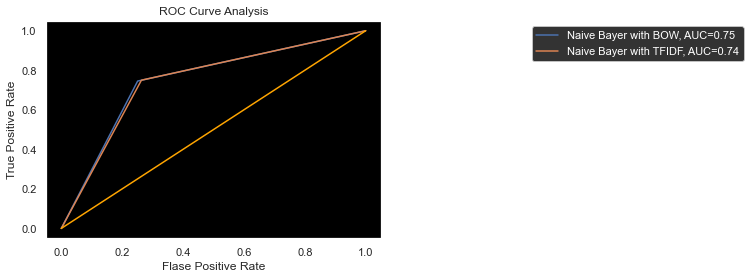

In [84]:
sns.set()
for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.2f}".format(i, result_table.loc[i]['auc']))

#fig = plt.figure(figsize=(8,6))
ax = plt.gca()
ax.set_facecolor('xkcd:black')
ax.grid(False)

plt.style.use("dark_background")
plt.plot([0,1], [0,1], color='orange')
plt.xlabel("Flase Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('ROC Curve Analysis')
plt.legend(bbox_to_anchor=(2.1, 1), loc='upper right')
plt.show()

**Observations:**

1.Recall score ---> BOW:0.752, TFIDF:0.7556

2.Both BOW and TFIDF models are overfitting a little